In [1]:
nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts = { 'epsabs' : 1.49e-03,
               'epsrel' : 1.49e-03,
               'limit'  : 20 }

In [6]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_coulomb_sphere_mass.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq)

def gradient_coulomb_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq)

In [7]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_sphere_mass.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq)

def gradient_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq)

In [8]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_sphere_mass_a.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def gradient_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a

    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [9]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_gradient_sphere_mass_fermi.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def gradient_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a

    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [10]:
%%cython
cdef extern from "numerical_integrators/cuba/calc_inductive_sphere_mass.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq)

def inductive_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq)

In [11]:
%%cython
# Приближение малых скоростей с учётом запаздывания
cdef extern from "numerical_integrators/cuba/calc_inductive_sphere_mass_a.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def inductive_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [12]:
%%cython
# Приближение малых скоростей с учётом запаздывания
cdef extern from "numerical_integrators/cuba/calc_inductive_sphere_mass_fermi.c":
    # интегрирование по координатам точек наблюдения
    double Ia (double r0, double q, double theta_a, double ra, double phi_q, double theta_q, double rq, double c, double a)

def inductive_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq):
    cdef double _r0      = r0
    cdef double _q       = q
    cdef double _theta_a = theta_a
    cdef double _ra      = ra
    cdef double _phi_q   = phi_q
    cdef double _theta_q = theta_q
    cdef double _rq      = rq
    cdef double _c       = c
    cdef double _a       = a
    return Ia(_r0, _q, _theta_a, _ra, _phi_q, _theta_q, _rq, _c, _a)

In [13]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_coulomb_sphere_mass = lambda r0, q : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_coulomb_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [14]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_sphere_mass = lambda r0, q : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [15]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_sphere_mass_on_a = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [16]:
from scipy import integrate as scipy_integrate
import numpy as np
gradient_sphere_mass_fermi = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  gradient_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [17]:
from scipy import integrate as scipy_integrate
import numpy as np
inductive_sphere_mass = lambda r0, q : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  inductive_sphere_mass_integrand(r0, q, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]])#, opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [18]:
from scipy import integrate as scipy_integrate
inductive_sphere_mass_on_a = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  inductive_sphere_mass_a_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]], opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [19]:
from scipy import integrate as scipy_integrate
inductive_sphere_mass_fermi = lambda r0, q, c, a : scipy_integrate.nquad(lambda theta_a, ra, phi_q, theta_q, rq : \
                                  inductive_sphere_mass_fermi_integrand(r0, q, c, a, theta_a, ra, phi_q, theta_q, rq), \
                                  [ [0, np.pi], [0, r0], [0, 2*np.pi],  [0, np.pi],  [0, r0]], opts=nquad_opts)
#                                    theta_a,    ra,       phi_q,        theta_q,      rq

In [20]:
_gradient_sphere_mass = 0.4
_inductive_sphere_mass = 1.2
_electrostatic_energy = 1.2
(0.4+1.2)/1.2

1.33333333333333

In [21]:
(4+12)/12

4/3

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженного сферического слоя с общим зарадом $e$ и радиусом $r$ равна $\frac{2}{3} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{1}{2} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженной сферы с общим зарадом $e$ и радиусом $r$ равна $\frac{8}{5} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{6}{5} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.

In [22]:
inductive_sphere_mass(1,1)
# (1.1999998963704677, 0.005411660477942615)
# (1.1999999997980622, 8.128824378894617e-08)

(-1.1999999997980622, 8.128824378894617e-08)

In [23]:
gradient_sphere_mass(1,1)

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(-0.3999999998324903, 4.54804878027501e-07)

In [24]:
inductive_sphere_mass(1,1)
# (1.1999998963704677, 0.005411660477942615)

(-1.1999999997980622, 8.128824378894617e-08)

In [25]:
# m_grad_coulomb_fermi = gradient_sphere_mass(r0 = 1, q = 1)[0]
m_grad_coulomb_fermi = 0.4
print("m_grad_coulomb_fermi = ", m_grad_coulomb_fermi)

m_grad_coulomb_fermi =  0.400000000000000


In [26]:
def mass_hysteresis(a):
    print("a =", a)
    m_ind = inductive_sphere_mass_on_a(r0 = 1, q = 1, c = 1, a = a)
    print("m_ind = ",  m_ind)
    m_grad = gradient_sphere_mass_on_a(r0 = 1, q = 1, c = 1, a = a)
    print("m_grad = ", m_grad)
    m = (m_ind[0] + m_grad[0] - m_grad_coulomb_fermi) / 6 * 5
    print("a =", a, "m =", m)
    return m

In [27]:
def mass_hysteresis_fermi(a):
    # print("a =", a)
    m_ind_fermi = inductive_sphere_mass_fermi(r0 = 1, q = 1, c = 1, a = a)
    print("m_ind_fermi = ",  m_ind_fermi)
    m_grad_fermi = gradient_sphere_mass_fermi(r0 = 1, q = 1, c = 1, a = a)
    print("m_grad_fermi = ", m_grad_fermi)
    m = (m_ind_fermi[0] + m_grad_fermi[0] - m_grad_coulomb_fermi) / 6 * 5
    print("a =", a, "m =", m)
    return m

In [28]:
mass_hysteresis_array = []
mass_hysteresis_lw_array = []
mass_hysteresis_fermi_array = []
for a in [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25]:
    m = mass_hysteresis(a)
    m_f = mass_hysteresis_fermi(a)
    mass_hysteresis_array += [(a, m, m_f)]
    mass_hysteresis_lw_array += [(a, m)]
    mass_hysteresis_fermi_array += [(a, m_f)]

a = 0.0500000000000000
m_ind =  (-1.1995701225903943, 0.005411670190957452)


/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


m_grad =  (0.3998709652299156, 3.255951022947786e-05)
a = 0.0500000000000000 m = -0.999749297800399
m_ind_fermi =  (-1.1991408320910102, 0.005411670850874906)
m_grad_fermi =  (0.39909926222040615, 3.2559115862621964e-05)
a = 0.0500000000000000 m = -1.00003464155884
a = 0.0600000000000000
m_ind =  (-1.1993802561474989, 0.005411663560736635)
m_grad =  (0.3998138928211004, 1.317235598346435e-05)
a = 0.0600000000000000 m = -0.999638636105332
m_ind_fermi =  (-1.198761617732484, 0.005411664511406844)
m_grad_fermi =  (0.3987024644518463, 1.3172284822050604e-05)
a = 0.0600000000000000 m = -1.00004929440053
a = 0.0700000000000000
m_ind =  (-1.1991552545400774, 0.005411665456307002)
m_grad =  (0.39974620539208905, 8.393910613574253e-06)
a = 0.0700000000000000 m = -0.999507540956657
m_ind_fermi =  (-1.1983124741199478, 0.005411666750468225)
m_grad_fermi =  (0.3982331423376702, 8.39380534920578e-06)
a = 0.0700000000000000 m = -1.00006610981856
a = 0.0800000000000000
m_ind =  (-1.1988948019023131, 

In [29]:
mass_hysteresis_array

[(0.0500000000000000, -0.999749297800399, -1.00003464155884),
 (0.0600000000000000, -0.999638636105332, -1.00004929440053),
 (0.0700000000000000, -0.999507540956657, -1.00006610981856),
 (0.0800000000000000, -0.999355852131630, -1.00008483119413),
 (0.0900000000000000, -0.999183379419088, -1.00010515555482),
 (0.100000000000000, -0.998989906448583, -1.00012673348614),
 (0.110000000000000, -0.998775180962971, -1.00014916521913),
 (0.120000000000000, -0.998538918542838, -1.00017199716660),
 (0.130000000000000, -0.998280797133521, -1.00019471581800),
 (0.140000000000000, -0.998000454889548, -1.00021674627651),
 (0.150000000000000, -0.997697484785243, -1.00023743758356),
 (0.200000000000000, -0.995825075051925, -1.00029220465469),
 (0.250000000000000, -0.993285909491581, -1.00015460119300)]

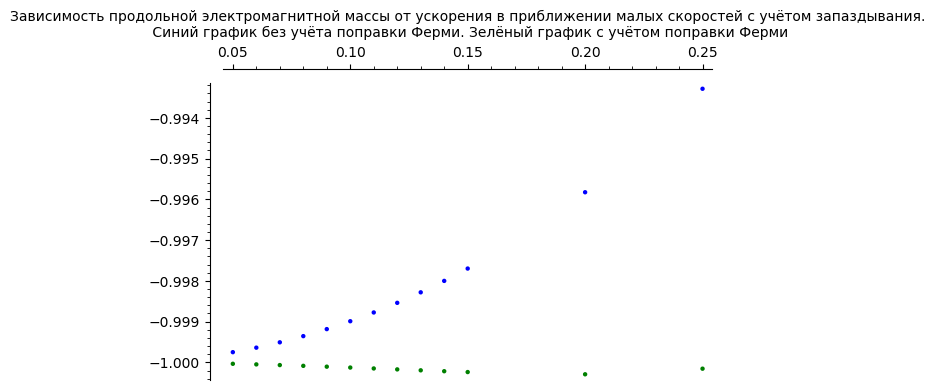

In [31]:
(list_plot(mass_hysteresis_lw_array) + list_plot(mass_hysteresis_fermi_array, color="green")
) .show(title = 
        "Зависимость продольной электромагнитной массы от ускорения в приближении малых скоростей с учётом запаздывания.\n"
        " Синий график без учёта поправки Ферми. Зелёный график с учётом поправки Ферми")

In [76]:
va = [ 
    0.0001,
     0.001,
     0.01,
     0.1,
     0.2,
     0.3,
     0.4,
     0.5,
     0.6,
     0.7,
     0.8,
     0.9,
     1.0,
     2.0,
     5.0,
     10.0,
     100.0,
     1000.0,
     1250.0,
     1500.0,
     1750.0,
     2000.0,
     2100.0
    ]

In [ ]:
for a in va:
    print(a, inductive_sphere_mass_on_a(1,1,1,a))

0.000100000000000000 (inf, inf)
0.00100000000000000 (inf, inf)
0.0100000000000000 (inf, inf)
0.100000000000000 (1.1982659892561969, 0.005411660537869789)
0.200000000000000 (1.1927949914577507, 0.005411664969900087)


/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (20) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.300000000000000 (nan, 0.00665065085663652)


In [29]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, gradient_sphere_mass_fermi(1,1,1,a))

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/

-0.200000000000000 (-0.3853806229848659, 5.061357680252008e-07)
-0.100000000000000 (-0.3963878789970252, 4.23679882968413e-06)
0.100000000000000 (0.3963878789970253, 4.4437535411935865e-06)
0.200000000000000 (0.3853806229848659, 4.548060077089189e-07)


In [ ]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, gradient_sphere_mass_on_a(1,1,1,a))

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr3/articles/

-0.200000000000000 (-0.397804901395441, 5.061631976670979e-07)
-0.100000000000000 (-0.3994781015178971, 4.236751755173836e-06)


In [11]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, inductive_sphere_mass_on_a(1,1,1,a))

-0.200000000000000 (-1.1927949914577507, 0.005411664970004448)
-0.100000000000000 (-1.1982659892561969, 0.005411660536732477)
0.100000000000000 (1.1982659892561969, 0.005411660537869789)
0.200000000000000 (1.1927949914577507, 0.005411664969900087)


In [28]:
for a in [-0.2,-0.1, 0.1, 0.2]:
    print(a, inductive_sphere_mass_fermi(1,1,1,a))

-0.200000000000000 (-1.1857312685704882, 0.005411675540702543)
-0.100000000000000 (-1.1965399591803991, 0.0054116631793981185)
0.100000000000000 (1.1965399591803991, 0.005411663180552306)
0.200000000000000 (1.185731268570488, 0.005411675540608396)


In [ ]:
for a in [-0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4]:
    print(a, inductive_sphere_mass_fermi(1,1,1,a))

In [ ]:
# 0.000100000000000000 (inf, inf)
# 0.00100000000000000 (inf, inf)
# 0.0100000000000000 (inf, inf)
# 0.100000000000000 (1.1982659892561969, 0.005411660537869789)
# 0.200000000000000 (1.1927949914577507, 0.005411664969900087)